FPT

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo hiển thị tiếng Việt
plt.rcParams['font.family'] = 'Arial'

# Đọc dữ liệu từ các file CSV
lsg = pd.read_csv('Data_VNM/vnm_lsg.csv', parse_dates=['Ngày'])
td = pd.read_csv('Data_VNM/vnm_td.csv', parse_dates=['Ngày'])
kn = pd.read_csv('Data_VNM/vnm_kn.csv', parse_dates=['Ngày'])
tkdl = pd.read_csv('Data_VNM/vnm_tkdl.csv', parse_dates=['Ngày'])

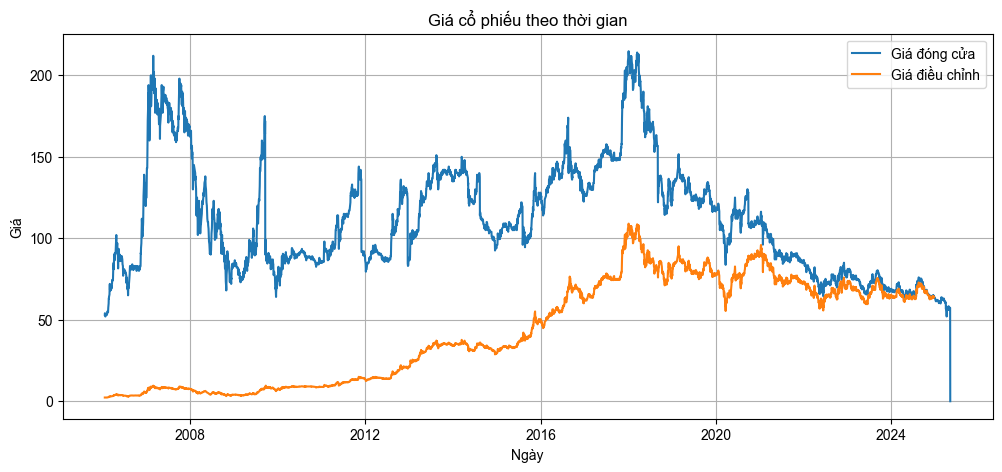

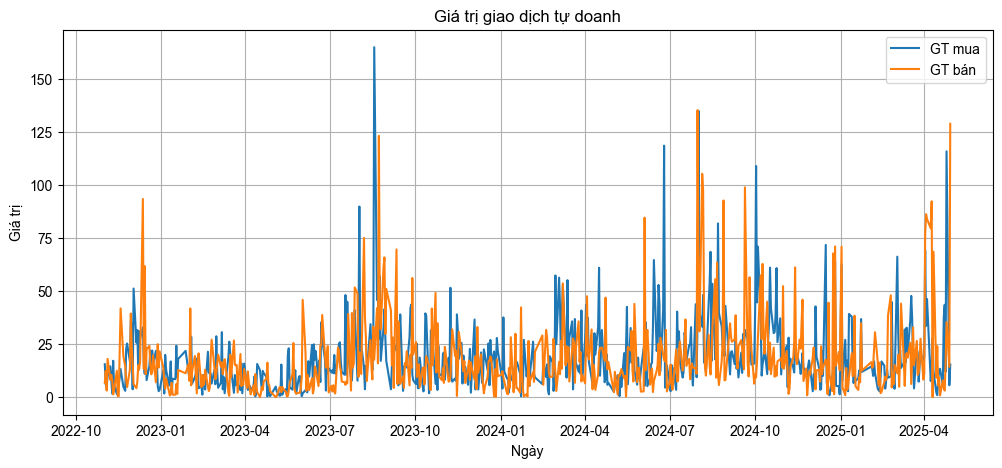

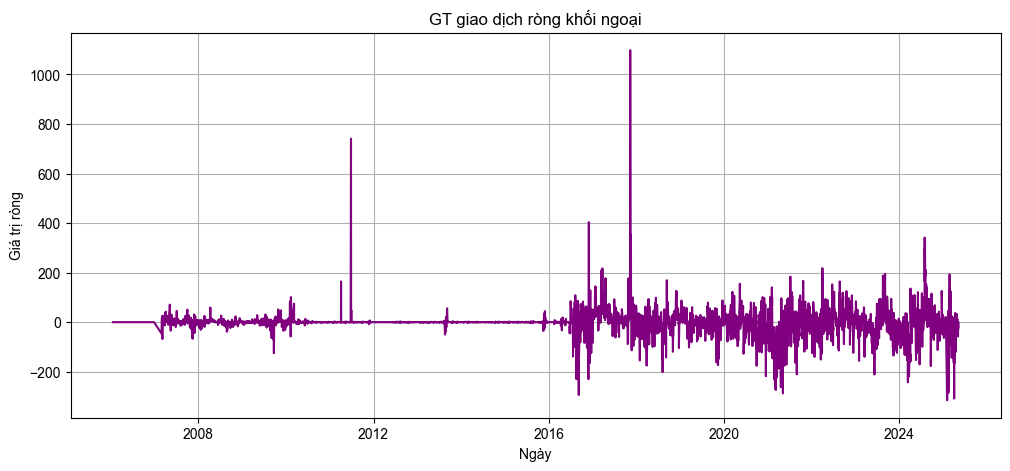

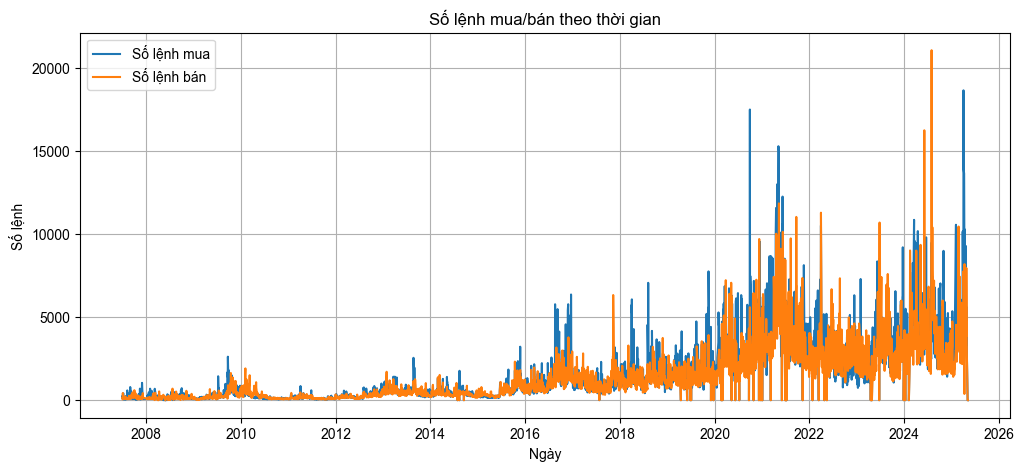

In [14]:
# Lịch sử giá
plt.figure(figsize=(12, 5))
plt.plot(lsg['Ngày'], lsg['Giá đóng cửa'], label='Giá đóng cửa')
plt.plot(lsg['Ngày'], lsg['Giá điều chỉnh'], label='Giá điều chỉnh')
plt.title("Giá cổ phiếu theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá")
plt.legend()
plt.grid()
plt.show()

# GT giao dịch tự doanh
plt.figure(figsize=(12, 5))
plt.plot(td['Ngày'], td['GT mua'], label='GT mua')
plt.plot(td['Ngày'], td['GT bán'], label='GT bán')
plt.title("Giá trị giao dịch tự doanh")
plt.xlabel("Ngày")
plt.ylabel("Giá trị")
plt.legend()
plt.grid()
plt.show()

# GT giao dịch ròng khối ngoại
plt.figure(figsize=(12, 5))
plt.plot(kn['Ngày'], kn['GT giao dịch ròng'], color='purple')
plt.title("GT giao dịch ròng khối ngoại")
plt.xlabel("Ngày")
plt.ylabel("Giá trị ròng")
plt.grid()
plt.show()

# Số lệnh mua/bán
plt.figure(figsize=(12, 5))
plt.plot(tkdl['Ngày'], tkdl['Số lệnh mua'], label='Số lệnh mua')
plt.plot(tkdl['Ngày'], tkdl['Số lệnh bán'], label='Số lệnh bán')
plt.title("Số lệnh mua/bán theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Số lệnh")
plt.legend()
plt.grid()
plt.show()


Độ lệch chuẩn giá điều chỉnh: 31.05
Hệ số tương quan giữa Giá đóng cửa và GT gd khớp lệnh: -0.12


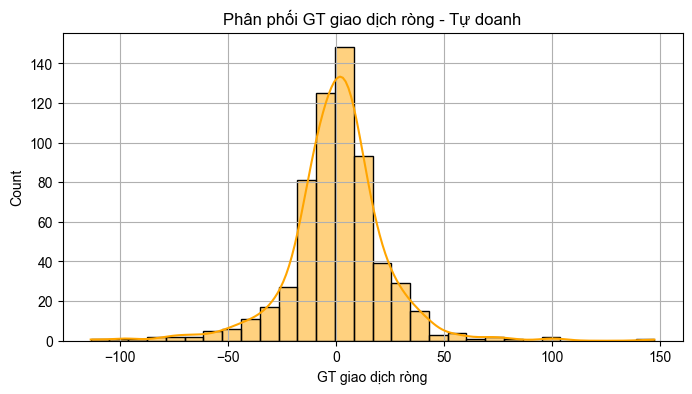

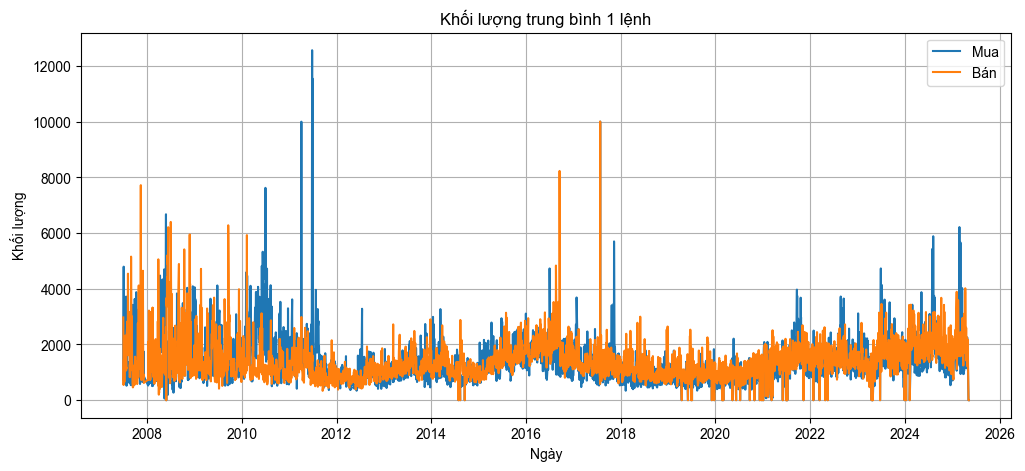

In [15]:
# Biến động giá
std_price = lsg['Giá điều chỉnh'].std()
print(f"Độ lệch chuẩn giá điều chỉnh: {std_price:.2f}")

# Tương quan giữa GT giao dịch và giá đóng cửa
corr = lsg[['Giá đóng cửa', 'GT gd khớp lệnh']].corr().iloc[0,1]
print(f"Hệ số tương quan giữa Giá đóng cửa và GT gd khớp lệnh: {corr:.2f}")

# Biểu đồ phân phối GT giao dịch ròng (tự doanh)
plt.figure(figsize=(8,4))
sns.histplot(td['GT giao dịch ròng'], bins=30, kde=True, color='orange')
plt.title("Phân phối GT giao dịch ròng - Tự doanh")
plt.xlabel("GT giao dịch ròng")
plt.grid()
plt.show()

# So sánh KLTB 1 lệnh mua/bán
plt.figure(figsize=(12,5))
plt.plot(tkdl['Ngày'], tkdl['KLTB 1 lệnh mua'], label='Mua')
plt.plot(tkdl['Ngày'], tkdl['KLTB 1 lệnh bán'], label='Bán')
plt.title("Khối lượng trung bình 1 lệnh")
plt.xlabel("Ngày")
plt.ylabel("Khối lượng")
plt.legend()
plt.grid()
plt.show()


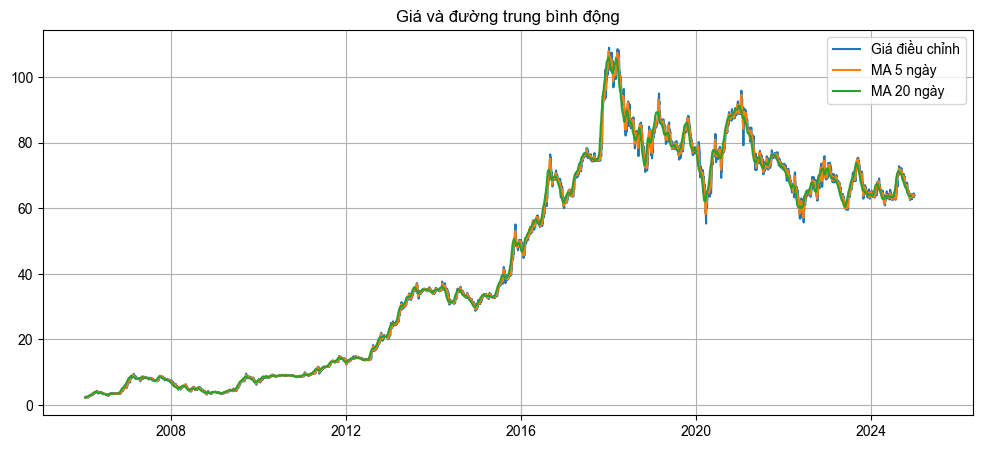

In [16]:
lsg['MA_5'] = lsg['Giá điều chỉnh'].rolling(window=5).mean()
lsg['MA_20'] = lsg['Giá điều chỉnh'].rolling(window=20).mean()

plt.figure(figsize=(12,5))
plt.plot(lsg['Ngày'], lsg['Giá điều chỉnh'], label='Giá điều chỉnh')
plt.plot(lsg['Ngày'], lsg['MA_5'], label='MA 5 ngày')
plt.plot(lsg['Ngày'], lsg['MA_20'], label='MA 20 ngày')
plt.title("Giá và đường trung bình động")
plt.legend()
plt.grid()
plt.show()


In [17]:
golden_cross = lsg[(lsg['MA_5'] > lsg['MA_20']) & (lsg['MA_5'].shift(1) <= lsg['MA_20'].shift(1))]
death_cross = lsg[(lsg['MA_5'] < lsg['MA_20']) & (lsg['MA_5'].shift(1) >= lsg['MA_20'].shift(1))]

print("🔔 Golden Cross ngày:", golden_cross['Ngày'].dt.date.tolist())
print("🔻 Death Cross ngày:", death_cross['Ngày'].dt.date.tolist())


🔔 Golden Cross ngày: [datetime.date(2024, 11, 27), datetime.date(2024, 11, 12), datetime.date(2024, 8, 22), datetime.date(2024, 7, 5), datetime.date(2024, 6, 12), datetime.date(2024, 5, 15), datetime.date(2024, 4, 10), datetime.date(2024, 1, 9), datetime.date(2023, 12, 11), datetime.date(2023, 11, 28), datetime.date(2023, 11, 23), datetime.date(2023, 10, 19), datetime.date(2023, 7, 31), datetime.date(2023, 5, 26), datetime.date(2023, 2, 17), datetime.date(2023, 2, 6), datetime.date(2022, 12, 8), datetime.date(2022, 11, 7), datetime.date(2022, 9, 23), datetime.date(2022, 7, 28), datetime.date(2022, 7, 20), datetime.date(2022, 7, 8), datetime.date(2022, 6, 6), datetime.date(2022, 5, 5), datetime.date(2022, 3, 3), datetime.date(2022, 1, 19), datetime.date(2021, 12, 16), datetime.date(2021, 9, 23), datetime.date(2021, 8, 18), datetime.date(2021, 7, 7), datetime.date(2021, 5, 11), datetime.date(2021, 3, 18), datetime.date(2021, 1, 21), datetime.date(2020, 12, 14), datetime.date(2020, 10, 26

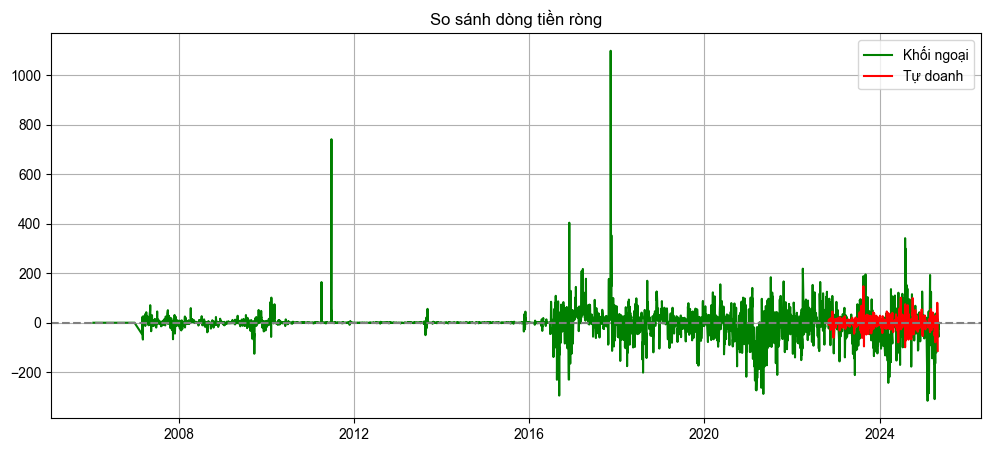

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(kn['Ngày'], kn['GT giao dịch ròng'], label='Khối ngoại', color='green')
ax.plot(td['Ngày'], td['GT giao dịch ròng'], label='Tự doanh', color='red')
ax.axhline(0, linestyle='--', color='gray')
plt.title("So sánh dòng tiền ròng")
plt.legend()
plt.grid()
plt.show()


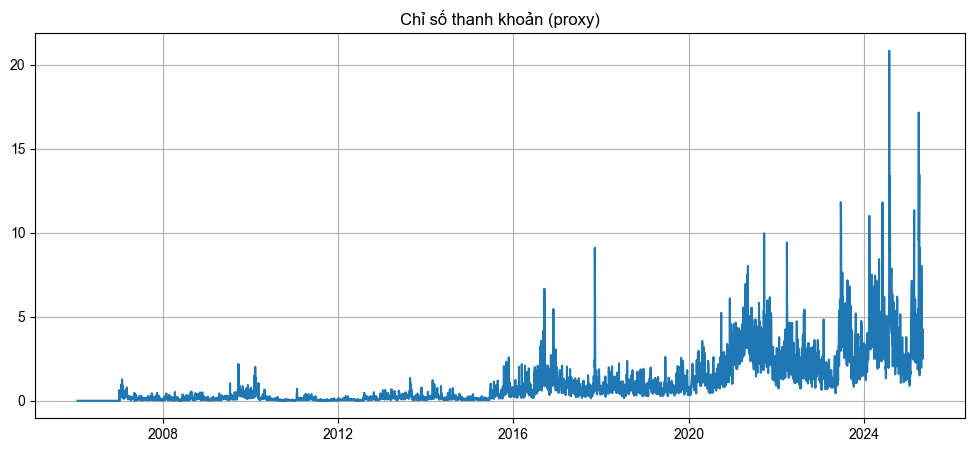

In [19]:
lsg['Thanh khoản'] = lsg['GT gd khớp lệnh'] / lsg['Giá đóng cửa']
plt.figure(figsize=(12,5))
plt.plot(lsg['Ngày'], lsg['Thanh khoản'])
plt.title("Chỉ số thanh khoản (proxy)")
plt.grid()
plt.show()


In [20]:
merged = pd.merge(lsg[['Ngày', 'Giá đóng cửa']], kn[['Ngày', 'GT giao dịch ròng']], on='Ngày')
corr_kn = merged['GT giao dịch ròng'].corr(merged['Giá đóng cửa'])
print(f"Hệ số tương quan GTGD ròng khối ngoại và giá đóng cửa: {corr_kn:.2f}")


Hệ số tương quan GTGD ròng khối ngoại và giá đóng cửa: 0.08


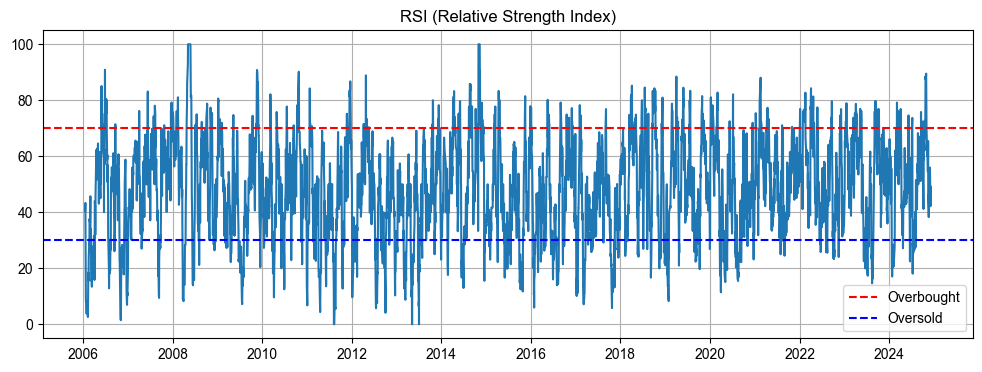

In [21]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

lsg['RSI'] = compute_rsi(lsg['Giá điều chỉnh'])

plt.figure(figsize=(12,4))
plt.plot(lsg['Ngày'], lsg['RSI'])
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='blue', label='Oversold')
plt.title("RSI (Relative Strength Index)")
plt.legend()
plt.grid()
plt.show()


In [22]:
print("Trung bình KLTB 1 lệnh mua:", tkdl['KLTB 1 lệnh mua'].mean())
print("Trung bình KLTB 1 lệnh bán:", tkdl['KLTB 1 lệnh bán'].mean())


Trung bình KLTB 1 lệnh mua: 1320.1527649977445
Trung bình KLTB 1 lệnh bán: 1391.57149300857


C:\Users\dongh\AppData\Local\Temp\ipykernel_5708\2142725159.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dongh\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


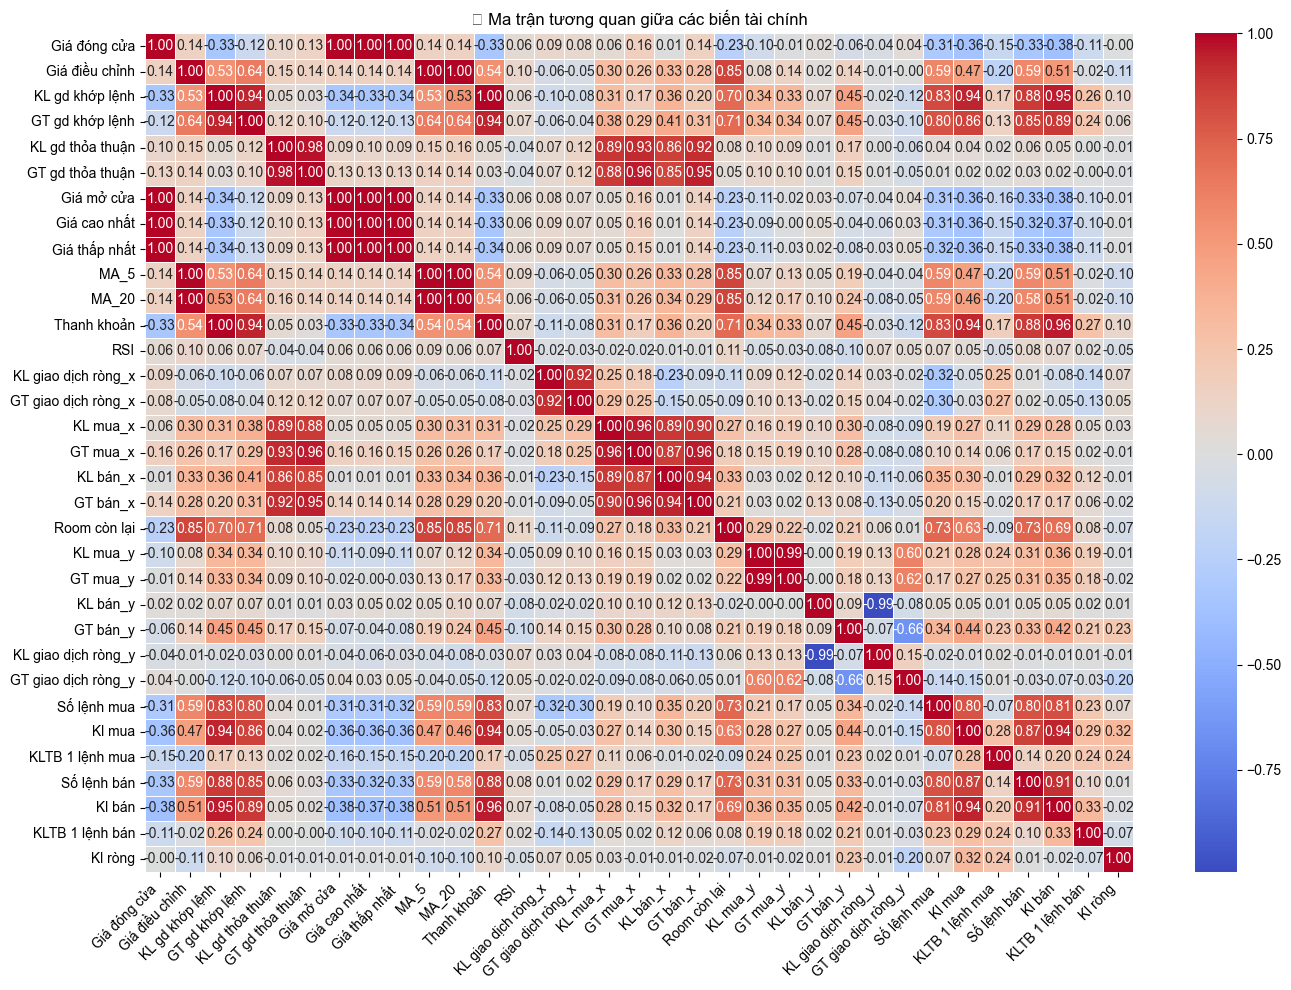

In [23]:
# Gộp các dataframe theo Ngày
merged = lsg.merge(kn, on="Ngày", how="left") \
            .merge(td, on="Ngày", how="left") \
            .merge(tkdl, on="Ngày", how="left")

# Chọn các cột số
numeric_cols = merged.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = merged[numeric_cols].corr()

import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("📊 Ma trận tương quan giữa các biến tài chính")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
